In [101]:
# 일반 회원들의 sequence 추출

# 이슈 회원들의 sequence 추출

# 일반 회원과 이슈 회원을 SID(x-axis), Support(y-axis) 별로 비교

In [102]:
# 글로벌 하게 사용할 객체 선언

# sid corpus
sid_list = {}
sid_index = 0

# SDB (temporary memory storage)
sdb = []

In [103]:
# Load the data
import csv
import pandas as pd

# Non issue users
no_issue_seq_data = pd.read_csv('./data/IP_SPLIT_NO_ISSUE_USERS_SEQ.csv')
# Issue users
issue_seq_data = pd.read_csv('./data/IP_SPLIT_ISSUE_USERS_SEQ.csv')

In [104]:
# Data of the non issue users
no_issue_seq_data.head(10)

,ID,IP,SEQUENCE_PARSE
0,1,119.67.115,"<76,77,73,24,21,21,78,161,101,152,100,152,59,1..."
1,2,211.104.55,"<161,24,24,161,24,161,101,152,100,152,161,4,16..."
2,3,1.235.19,"<161,78,80,76,77,73,27,101,150,100,150,106,80,..."
3,4,66.249.69,"<161,4,161,4,161,4,161,4,161,4,161,4,161,4,161..."
4,5,46.229.168,<161>
5,6,211.39.150,"<161,4,161,4,161,4,161,4,161,4,161,4,161,4,161..."
6,7,103.67.235,<161>
7,8,66.249.75,"<161,157,161,4,161,4,161,4,161,4,161,4,161,4,1..."
8,9,115.139.19,"<161,152,78,80,161,78,80>"
9,10,159.203.125,<161>


In [105]:
# Note. 현재 데이터가 유니크하게 존재하지 않는 문제가 있음 
# Data of the issue users
issue_seq_data.head(10)

,ID,userId,TEMP_IP_SPLIT2,SEQUENCE_PARSE
0,1,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
1,2,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
2,3,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
3,4,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
4,5,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
5,6,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
6,7,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
7,8,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
8,9,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
9,10,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."


In [106]:
# 이슈 데이터의 중복된 userId row 는 삭제
issue_seq_data.drop_duplicates(['userId'], keep='last')

,ID,userId,TEMP_IP_SPLIT2,SEQUENCE_PARSE
119,120,21353,223.62.212,"<102,101,103,154,115,115,103,115,154,115,102,1..."
155,156,18116,175.212.239,"<148,107,148,148,113,114,148,120,119,118,121,1..."
253,254,23624,223.33.165,"<116,116>"
371,372,25989,61.79.184,"<116,103,115,89,107,103,115,154,115,148,103,11..."
430,431,12518,203.237.172,"<133,148,83,83,85,81,84,102,101,102,101,148,10..."
672,673,18758,175.223.35,"<134,90,90,138,90,90,90,138,90,90,90,138,90,90..."
775,776,28751,117.111.3,"<138,107,103,115,154,115>"
805,806,13536,218.38.164,"<133,102,101,102,101,102,101,102,101,103,115,8..."
846,847,25517,220.118.22,"<102,101,148,148,113,114,148,113,114,148,113,1..."
1018,1019,20824,115.143.44,"<148,89,84,138,89,89,86,138,86,89,89,148,148,8..."


In [107]:
issue_seq_data.head(10)

,ID,userId,TEMP_IP_SPLIT2,SEQUENCE_PARSE
0,1,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
1,2,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
2,3,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
3,4,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
4,5,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
5,6,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
6,7,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
7,8,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
8,9,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
9,10,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."


In [108]:
# 시퀸스의 시작, 종료 토큰을 제외한 아이템을 콤마(',') 를 기준으로 분리하여
# 아이템 배열을 만들어서 리턴해준다
def sequence_tokenize(seq):
    return seq.replace('<', '').replace('>', '').split(',')

In [109]:
# bi, tri 등 어떤 ngram 을 만들지와 시퀸스 하나를 받아
# ngram dictionary 를 만들어서 리턴해준다
def extract_ngram(n, seq_items):
    result = []
    for idx, item in enumerate(seq_items):
        window_set = seq_items[idx:idx + n]
        if len(window_set) == n:
            result.append(','.join([str(x) for x in window_set]))
    return result

In [110]:
from collections import defaultdict

# 전에 data set 을 받아 ngram 을 만들어 리턴
def extract_ngram_set(n, seq_datas):
    # 아직 나타나지 않은 ngram 을 0 값에서 시작시키기 위해 디폴트 값을 사용
    result = defaultdict(int)
    for index, row in seq_datas.iterrows():
        # ngram 을 추출
        ngram = extract_ngram(n, sequence_tokenize(row['SEQUENCE_PARSE']))
        # ngram dictionary 에 저장
        for item in ngram:
            result[item] += 1
    return pd.DataFrame(result.items(), columns=['sequence', 'support'])

In [111]:
# 글로벌 sdb 에 추출한 시퀸스들을 등록하는 함수
# def save_to_sdb(list, type='normal'):
    

In [112]:
# 매개변수로 전달된 시퀸스의 SID 를 리턴하는 함수
def get_sid(sequence):
    global sid_list
    global sid_index
    if sequence in sid_list:
        return sid_list[sequence]
    else:
        sid_list[sequence] = sid_index
        sid_index += 1
        return sid_list[sequence]

In [113]:
# 비-이슈 회원들의 ngram 을 추출
normal_ngram = extract_ngram_set(2, no_issue_seq_data)
# 가장 많이 나타나는 패턴 순으로 확인하기 위해 support 값 순으로 정렬
normal_ngram.sort_values(['support'], ascending=[False]).head(10)

,sequence,support
2595,"161,4",235817
1642,"4,161",235497
2020,"29,150",193528
2479,"150,29",164117
2390,"150,150",138831
690,"30,152",83886
744,"152,30",71856
1669,"101,152",64161
68,"152,100",63661
1668,"101,150",53961


In [114]:
# SID 를 부여
normal_ngram = pd.DataFrame(normal_ngram)
normal_ngram['SID'] = 0
normal_sid = []
for index, row in normal_ngram.iterrows():
    normal_sid.append(get_sid(row['sequence']))
normal_ngram['SID'] = pd.Series(normal_sid)

In [115]:
normal_ngram_support_sum = normal_ngram['support'].sum()
normal_ngram['relSupport'] = normal_ngram['support'] / normal_ngram_support_sum
normal_ngram.head(10)

,sequence,support,SID,relSupport
0,"66,4",8,0,3.251599e-06
1,"10,36",1,1,4.064499e-07
2,"161,99",1,2,4.064499e-07
3,"33,112",1,3,4.064499e-07
4,"97,111",378,4,1.536381e-04
5,"97,112",5,5,2.032249e-06
6,"97,113",1,6,4.064499e-07
7,"97,114",20,7,8.128997e-06
8,"97,115",10,8,4.064499e-06
9,"33,115",8733,9,3.549527e-03


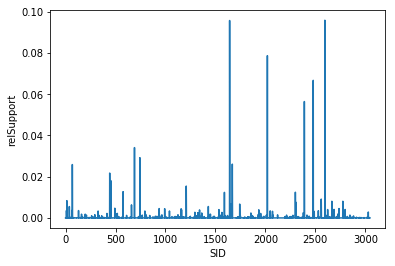

In [132]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

normal_ngram = normal_ngram.sort_values(['SID'], ascending=[True])

x = normal_ngram['SID']
y = normal_ngram['relSupport']

plt.xlabel('SID')
plt.ylabel('relSupport')

plt.plot(x, y)
plt.show()

In [117]:
# 이슈 회원들의 ngram 을 추출
issue_ngram = extract_ngram_set(2, issue_seq_data)
# 가장 많이 나타나는 패턴 순으로 확인하기 위해 support 값 순으로 정렬
issue_ngram.sort_values(['support'], ascending=[False]).head(10)

,sequence,support
60,"102,101",27117
0,"103,103",16727
95,"101,103",13387
42,"103,115",9040
58,"148,113",8839
126,"113,114",8839
117,"148,148",8519
94,"101,102",7777
151,"114,148",5933
52,"115,154",5326


In [118]:
issue_ngram = pd.DataFrame(issue_ngram)
issue_ngram['SID'] = 0
issue_sid = []
for index, row in issue_ngram.iterrows():
    issue_sid.append(get_sid(row['sequence']))
issue_ngram['SID'] = pd.Series(issue_sid)

In [119]:
issue_ngram_support_sum = issue_ngram['support'].sum()
issue_ngram['relSupport'] = issue_ngram['support'] / issue_ngram_support_sum
issue_ngram.head(10)

,sequence,support,SID,relSupport
0,"103,103",16727,3047,0.076473
1,"87,148",48,1474,0.000219
2,"118,148",266,3048,0.001216
3,"138,89",2613,3049,0.011946
4,"107,102",632,3050,0.002889
5,"103,107",389,3051,0.001778
6,"104,148",138,3052,0.000631
7,"118,119",60,767,0.000274
8,"116,116",4841,3053,0.022132
9,"118,112",293,3054,0.001340


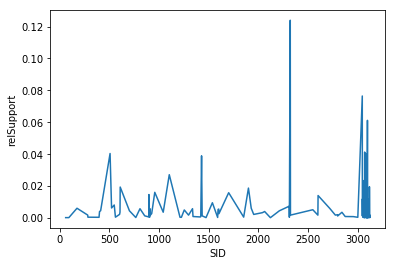

In [131]:
issue_ngram = issue_ngram.sort_values(['SID'], ascending=[True])

x = issue_ngram['SID']
y = issue_ngram['relSupport']

plt.xlabel('SID')
plt.ylabel('relSupport')

plt.plot(x, y)
plt.show()

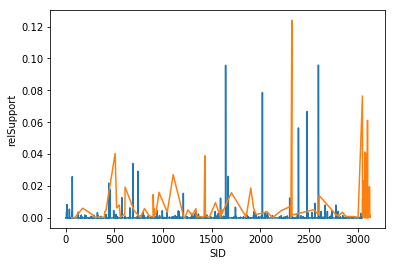

In [130]:
n_x = normal_ngram['SID']
n_y = normal_ngram['relSupport']

i_x = issue_ngram['SID']
i_y = issue_ngram['relSupport']

plt.xlabel('SID')
plt.ylabel('relSupport')

plt.plot(n_x, n_y)
plt.plot(i_x, i_y)
plt.show()